# Stimulating single fibers with NRV
-----------------------------

In this tutorial, we will create a monofasciclur nerve, populate it with one fiber and stimulate it with intra- and extra-fascicular electrodes. We will explore conventional stimulation (monophasic/biphasic stimulation) and high-frequency stimulation for conduction block.

As before, we start by importing the NRV package as well as numpy and matplotlib:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
sys.path.append("../")
import nrv

## Axon definition
Let's start by creating a 10µm myelinated axon, similarly to previous tutorials:

In [ ]:
model= 'MRG'
# axon location
z_axon = 0	  # axon z position, in [um]
y_axon = 0  # axon z position, in [um]

pw = 50
pw = pw*1e-3

n_node = 20
diam = 10
L=nrv.get_length_from_nodes(diam,n_node)
axon_m = nrv.myelinated(y_axon,z_axon,diam,L,rec='nodes',model=model)

### Simulation box size
Outer_D = 10     # in in [mm]

#### Nerve and fascicle geometry
Nerve_D = 1500      # in [um]
Fascicle_D = 1000    # in [um]

print(f"Simulation with fenicsx - LIFE - PW = {int(pw*1e3)}us - D_axon {diam}um")
extra_stim = nrv.FEM_stimulation(endo_mat='endoneurium_ranck')
extra_stim.reshape_nerve(Nerve_D, L)
extra_stim.reshape_outerBox(Outer_D)
extra_stim.reshape_fascicle(Fascicle_D)#,Perineurium_thickness=perineurium_thickeness)
 
#Center the LIFE on the middle node of ranvier 
#LIFE 
LIFE_length = 1000             #electrode active site length
y_elect = 0
z_elect = 100
D_1 = 25                    #electrode diam
#n_node = len(axon_m.x_nodes)
x_elec = axon_m.x_nodes[n_node//2]	# electrode y position, in [um]
y_c = 0 
x_1_offset = x_elec - (LIFE_length/2)
LIFE = nrv.LIFE_electrode('LIFE_1', D_1, LIFE_length, x_1_offset, y_elect, z_elect)

#dummy useless stimulus
start = 0.5
I_cathod = 50
T_cathod = pw
stim1 = nrv.stimulus()
stim1.pulse(start, -I_cathod, T_cathod)#, I_anod, T_inter)

# extracellular stimulation setup
extra_stim.add_electrode(LIFE, stim1)
axon_m.attach_extracellular_stimulation(extra_stim)
res = axon_m(t_sim =3)

## Extracellular context Creation

We now need to create the extracellular context of our model, which consists in the nerve and electrode geometry, as well as defining the material properties. We will create two extracellular context, one with LIFE and one with cuff-like electrode. Extracellular context instances are created with the ```FEM_stimulation```-class. We can also specify the endoneurium conductivity. Here we will use ```endoneurium_ranck```. 

In [3]:
### Simulation box size
Outer_D = 10     # in in [mm]

#### Nerve and fascicle geometry
Nerve_D = 1500      # in [um]
Fascicle_D = 1000    # in [um]

extra_stim = nrv.FEM_stimulation(endo_mat='endoneurium_ranck')
extra_stim.reshape_nerve(Nerve_D, L)
extra_stim.reshape_outerBox(Outer_D)
extra_stim.reshape_fascicle(Fascicle_D)#,Perineurium_thickness=perineurium_thickeness)

We can set the diameter of our nerves to 1500µm and length slighly longer than the axon length (to facilitate FEM computation):

Finally, we add the electrodes to our FEM models. Let's start by creating a 1000µm in length, 25µm in diameter LIFE electrode. The central point of the LIFE active-site is aligned with the 10th node-of-ranvier of our fiber, and located 100µm away (on the z-axis) from the fiber:

In [4]:
#Center the LIFE on the middle node of ranvier 
#LIFE 
LIFE_length = 1000             #electrode active site length
y_elect = 0
z_elect = 100
D_1 = 25                    #electrode diam
#n_node = len(axon_m.x_nodes)
x_elec = axon_m.x_nodes[n_node//2]	# electrode y position, in [um]
y_c = 0 
x_1_offset = x_elec - (LIFE_length/2)
LIFE = nrv.LIFE_electrode('LIFE_1', D_1, LIFE_length, x_1_offset, y_elect, z_elect)

Similarly, we create a monopolar cuff-like electrode:

In [5]:
#contact_width=500               #width (length) of the cuff active-site, in um
#contact_thickness=100           #tickness of the cuff active-site, in um
#insulator_width=1000            #width (length) of the cuff insulator, in um
#insulator_thickness=500         #tickness of the cuff insulator, in um

#x_cuff = axon_m.x_nodes[n_NoR//2] # cuff z position, in [um]
#cuff = nrv.CUFF_electrode('CUFF_1', contact_length=contact_width,
#        contact_thickness=contact_thickness, insulator_length=insulator_width,
#        insulator_thickness=insulator_thickness, x_center=x_cuff)

Before linking our electrodes to their FEM models, we need to setup a stimulus. For that, we create a very basic monophasic cathodic 100µs/10µA pulse:

In [6]:
#dummy useless stimulus
start = 0.5
I_cathod = 50
T_cathod = 50*1e-3
stim1 = nrv.stimulus()
stim1.pulse(start, -I_cathod, T_cathod)#, I_anod, T_inter)

We can plot the stimulus to check it, using built-in plot function of the ```stimulus```class:

Text(0, 0.5, 'amplitude (µA)')

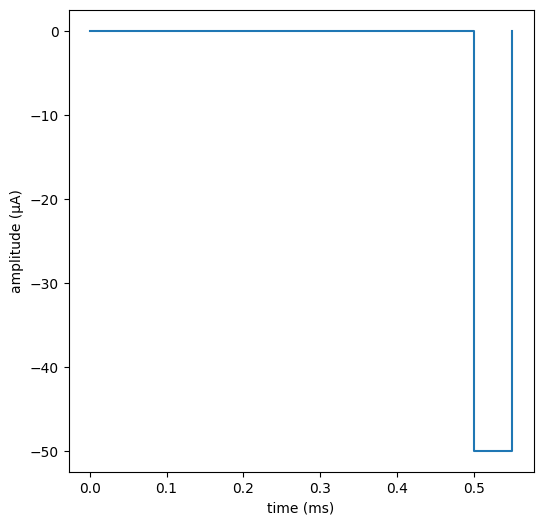

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
stim1.plot(ax)
ax.set_xlabel("time (ms)")
ax.set_ylabel("amplitude (µA)")

Electrodes can be simply linked the FEM model by using the ```add_electrode```-method of the ```FEM_stimulation```-object, which combine an ```electrode```-object to a ```stimulus```-object and attach it to the FEM model:

In [8]:
# extracellular stimulation setup
extra_stim.add_electrode(LIFE, stim1)
axon_m.attach_extracellular_stimulation(extra_stim)
res = axon_m(t_sim =3)

: 